In [122]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import re
import seaborn as sns
import lxml.html as lx
from lxml import html
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import *



import matplotlib.transforms as mtrans

# Clean player name

In [3]:
def clean_name(df, colname):
    pat = r'(\,|\'|\.|Jr|Sr|III |IV )'
    df[colname] = df[colname].replace(pat, '', regex=True)    
    return(df)

# Awards

In [4]:
def clean_awards(df, dictionary):
    df.drop(['Player'], axis = 1, inplace = True)
    df = df.loc[df['Year'] >= 2000,:]
    df['Tm'] = df['Tm'].map(dictionary)
    return(df)

# Team Name Abbreviations

In [5]:
nfl_team_name = pd.read_csv('nfl_teams.csv')
names = nfl_team_name.drop(['ID', 'Conference', 'Division'], axis = 1)
abbrv = dict(names.values)

abbrv.update({'Green Bay Packers': 'GNB', 'Kansas City Chiefs': 'KAN', 'New England Patriots':'NWE', 
             'New Orleans Saints':'NOR', 'Las Vegas Raiders':'LVR', 'San Francisco 49ers':'SFO',
             'Tampa Bay Buccaneers':'TAM'})

abbrv['San Diego Chargers'] = 'LAC'
abbrv['Oakland Raiders'] = 'LVR'
abbrv['Washington Redskins'] = 'WAS'
abbrv['Washington Football Team'] = 'WAS'
abbrv['St. Louis Rams'] = 'LAR'
abbrv['St Louis Rams'] = 'LAR'

# mvp

In [6]:
mvp = pd.read_csv('MVP_season', index_col=[0])
mvp = clean_awards(mvp, abbrv)
mvp.head()

,Year,Tm,MVPs
0,2022,KAN,1
1,2021,GNB,1
2,2020,GNB,1
3,2019,BAL,1
4,2018,KAN,1


# OPOY

In [7]:
opoy = pd.read_csv('opoy_season', index_col=[0])
opoy = clean_awards(opoy, abbrv)
opoy.head()

,Year,Tm,OPOYs
0,2022,MIN,1
1,2021,LAR,1
2,2020,TEN,1
3,2019,NOR,1
4,2018,KAN,1


# DPOY

In [8]:
dpoy = pd.read_csv('dpoy_season', index_col=[0])
dpoy = clean_awards(dpoy, abbrv)
dpoy.tail()

,Year,Tm,DPOYS
18,2004,BAL,1
19,2003,BAL,1
20,2002,TAM,1
21,2001,NYG,1
22,2000,BAL,1


# ROY Offense

In [9]:
roy_offense = pd.read_csv('ROYoffense', index_col=[0])
roy_offense = clean_awards(roy_offense, abbrv)
roy_offense.tail(16)

,Year,Tm,ROY_OFFENSE
50,2007,MIN,1
51,2008,ATL,1
52,2009,MIN,1
53,2010,LAR,1
54,2011,CAR,1
55,2012,WAS,1
56,2013,GNB,1
57,2014,NYG,1
58,2015,LAR,1
59,2016,DAL,1


# ROY Defense

In [10]:
roy_defense = pd.read_csv('ROYdefense', index_col=[0])
roy_defense = clean_awards(roy_defense, abbrv)
roy_defense.tail(16)

,Year,Tm,ROY_DEFENSE
40,2007,SFO,1
41,2008,NWE,1
42,2009,HOU,1
43,2010,DET,1
44,2011,DEN,1
45,2012,CAR,1
46,2013,NYJ,1
47,2014,LAR,1
48,2015,KAN,1
49,2016,LAC,1


In [11]:
def probowl_allpro(df):
    df.loc[(df['Tm'] == 'SDG'), 'Tm'] = 'LAC'
    df.loc[(df['Tm'] == 'OAK'), 'Tm'] = 'LVR'
    df.loc[(df['Tm'] == 'STL'), 'Tm'] = 'LAR'

    df = df[~(df['Tm'] == '2TM')] 
    return(df)

# Non-QB Probowl

In [12]:
probowl_nonqb = pd.read_csv('nonqb_probowls', index_col=[0])
probowl_nonqb = probowl_allpro(probowl_nonqb)
probowl_nonqb.head()

,Year,Tm,ProBowl
0,2000,ARI,1
1,2000,BAL,5
2,2000,BUF,4
3,2000,CAR,1
4,2000,CHI,1


# QB Probowl

In [13]:
probowl_qb = pd.read_csv('QB_probowl', index_col=[0])
probowl_qb = probowl_allpro(probowl_qb)
probowl_qb.rename(columns = {'ProBowl':'QBProBowl'}, inplace=True)
probowl_qb

,Year,Tm,QBProBowl
0,2000,DEN,1
1,2000,IND,1
2,2000,KAN,1
3,2000,MIN,1
4,2000,LVR,1
...,...,...,...
197,2022,KAN,1
198,2022,LVR,1
199,2022,MIN,1
200,2022,PHI,1


# All Pros

In [14]:
allpro_firstteam = pd.read_csv('1stTeam.csv', index_col=[0])
allpro_secondteam = pd.read_csv('2ndTeam.csv', index_col=[0])

allpro_firstteam = probowl_allpro(allpro_firstteam)
allpro_secondteam = probowl_allpro(allpro_secondteam)

allpro_secondteam

,Year,Tm,2ndTeam
0,2000,ATL,1
1,2000,BAL,3
2,2000,BUF,2
3,2000,DEN,1
4,2000,DET,1
...,...,...,...
380,2022,NYJ,1
381,2022,PHI,4
382,2022,SFO,1
383,2022,TAM,1


In [15]:
allpro_firstteam

,Year,Tm,1stTeam
0,2000,BAL,2
1,2000,DAL,1
2,2000,DEN,1
3,2000,GNB,1
4,2000,KAN,1
...,...,...,...
318,2022,MIN,1
319,2022,NYJ,2
320,2022,PHI,2
321,2022,PIT,1


# Merge Awards and EDA

In [25]:
awards = mvp.merge(opoy,on=['Tm','Year'], how = 'outer').merge(dpoy,on=['Tm','Year'], how = 'outer').merge(roy_offense, on=['Tm','Year'], how = 'outer').merge(roy_defense, on=['Tm','Year'], how = 'outer').merge(probowl_qb, on=['Tm','Year'], how = 'outer').merge(probowl_nonqb, on=['Tm','Year'], how = 'outer').merge(allpro_firstteam, on=['Tm','Year'], how = 'outer').merge(allpro_secondteam, on=['Tm','Year'], how = 'outer')
awards.fillna(0, inplace=True)
awards['Allpro'] = awards['1stTeam'] + awards['2ndTeam']
awards


,Year,Tm,MVPs,OPOYs,DPOYS,ROY_OFFENSE,ROY_DEFENSE,QBProBowl,ProBowl,1stTeam,2ndTeam,Allpro
0,2022,KAN,1.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.0,5.0
1,2021,GNB,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,3.0
2,2020,GNB,1.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,2.0,6.0
3,2019,BAL,1.0,0.0,0.0,0.0,0.0,1.0,11.0,3.0,1.0,4.0
4,2018,KAN,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
674,2000,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
675,2003,LAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
676,2012,LAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
677,2020,CIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [180]:
def plots(width,height,data,x,y,palette,xlabel,ylabel,title, hue):
    plt.figure(figsize = (width,height))
    ax = sns.barplot(data=data, x=x, y=y, palette = palette, hue = hue, dodge=False)
    ax.set(xlabel=xlabel, ylabel=ylabel, title = title)
    trans = mtrans.Affine2D().translate(8, 0)
    for t in ax.get_xticklabels():
        t.set_transform(t.get_transform()+trans)
    return(ax)

### Teams with most MVP Players since 2000

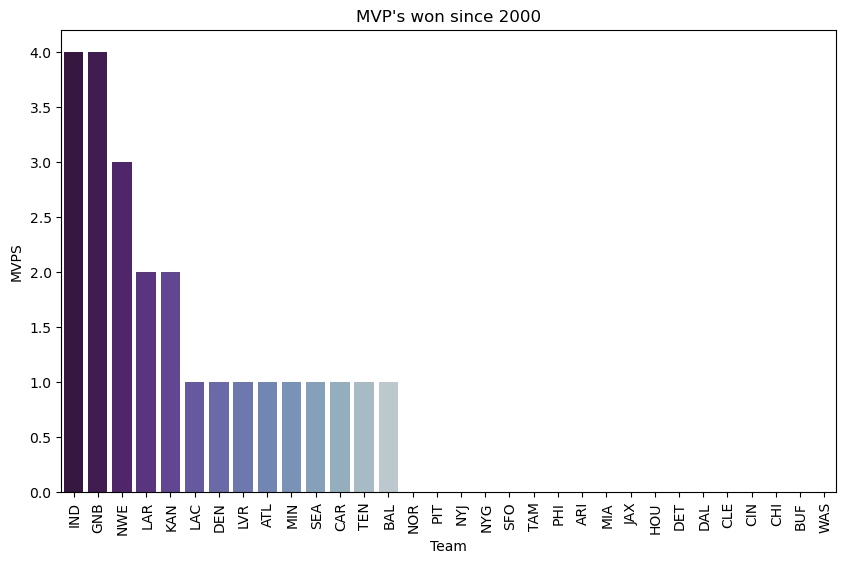

In [181]:
ax = plots(10,6,awards.groupby(['Tm'], as_index=False)['MVPs'].sum().sort_values('MVPs',ascending = False), 'Tm', 'MVPs',
     'twilight_shifted', 'Team', 'MVPS',"MVP's won since 2000", None)
plt.xticks(rotation=90, ha='right')
plt.show()


### Most ProBowl selections in a single season since 2000

In [60]:
idx_probowl = awards.loc[awards.groupby("Year")["ProBowl"].idxmax()]
idx_probowl

,Year,Tm,MVPs,OPOYs,DPOYS,ROY_OFFENSE,ROY_DEFENSE,QBProBowl,ProBowl,1stTeam,2ndTeam,Allpro
266,2000,TAM,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,3.0
109,2001,PHI,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,2.0,3.0
115,2002,PHI,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2.0,4.0,6.0
33,2003,BAL,0.0,1.0,1.0,0.0,1.0,0.0,8.0,4.0,2.0,6.0
60,2004,PIT,0.0,0.0,0.0,1.0,0.0,0.0,9.0,3.0,3.0,6.0
132,2005,IND,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,2.0,6.0
16,2006,LAC,1.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,0.0,5.0
142,2007,DAL,0.0,0.0,0.0,0.0,0.0,1.0,12.0,3.0,2.0,5.0
151,2008,TEN,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,1.0,5.0
65,2009,MIN,0.0,0.0,0.0,1.0,0.0,1.0,9.0,4.0,0.0,4.0


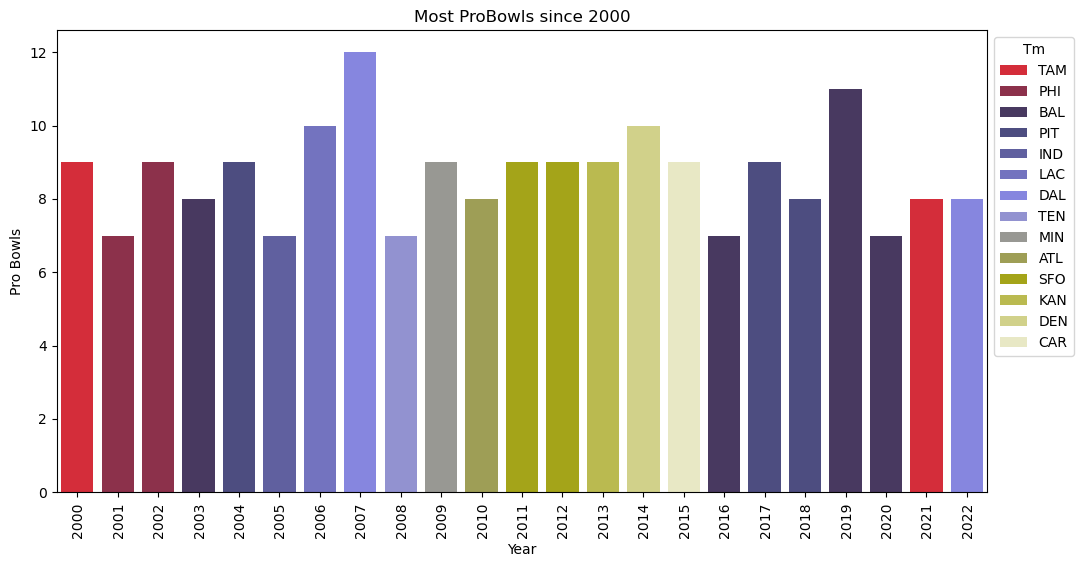

In [182]:
ax = plots(12,6,idx_probowl, 'Year', 'ProBowl','gist_stern', 'Year', 'Pro Bowls', "Most ProBowls since 2000", 'Tm')
plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
### Most AllPro selections in a single season since 2000

In [62]:
idx_allpro = awards.loc[awards.groupby("Year")["Allpro"].idxmax()]
idx_allpro

,Year,Tm,MVPs,OPOYs,DPOYS,ROY_OFFENSE,ROY_DEFENSE,QBProBowl,ProBowl,1stTeam,2ndTeam,Allpro
105,2000,TEN,0.0,0.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,7.0
22,2001,LAR,1.0,1.0,0.0,0.0,0.0,1.0,6.0,4.0,2.0,6.0
115,2002,PHI,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2.0,4.0,6.0
33,2003,BAL,0.0,1.0,1.0,0.0,1.0,0.0,8.0,4.0,2.0,6.0
60,2004,PIT,0.0,0.0,0.0,1.0,0.0,0.0,9.0,3.0,3.0,6.0
51,2005,CHI,0.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,6.0
16,2006,LAC,1.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,0.0,5.0
15,2007,NWE,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0,9.0
149,2008,NYG,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,3.0,5.0
423,2009,BAL,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,4.0,5.0


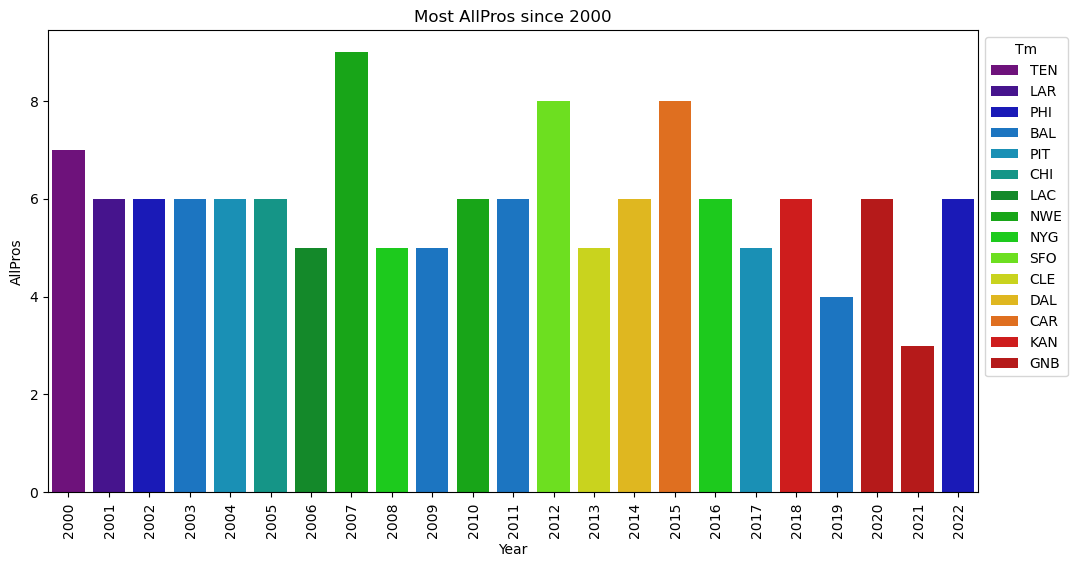

In [183]:
ax = plots(12,6,idx_allpro, 'Year', 'Allpro','nipy_spectral', 'Year', 'AllPros',"Most AllPros since 2000", 'Tm')
plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# NFL Standings, Divisions, Playoffs, Championships, Superbowls

In [70]:
def scrape_stats(yearstart, yearend, folder, id_):
    df = []
    check = folder
    for year in range(yearstart,yearend):
        with open("{}/{}.html".format(folder,year)) as f:
            page = f.read()

        soup = bs(page, 'html.parser')
        soup.find('tr', class_ = 'thead').decompose()
        table = soup.find('table', id = id_)
        table_stats = pd.read_html(str(table))[0]
        table_stats['Year'] = year
        df.append(table_stats)
    final_df = pd.concat(df)
    return(final_df)

## NFL Standings

In [71]:
def clean_standings(df,colname):
    df = df[~(df['Tm'].str.contains(colname))]
    df = df[['Tm', 'W-L%', 'Year']]
    df['Tm'] = df['Tm'].replace('[^a-zA-Z0-9 ]', '', regex=True)


    df['Tm'] = np.where(df.Tm == 'St Louis Rams', 'Los Angeles Rams', df.Tm)
    df['Tm'] = np.where(df.Tm == 'St. Louis Rams', 'Los Angeles Rams', df.Tm)
    df['Tm'] = np.where(df.Tm == 'Washington Redskins', 'Washington Commanders', df.Tm)
    df['Tm'] = np.where(df.Tm == 'Washington Football Team', 'Washington Commanders', df.Tm)
    df['Tm'] = np.where(df.Tm == 'Oakland Raiders', 'Las Vegas Raiders', df.Tm)
    df['Tm'] = np.where(df.Tm == 'San Diego Chargers', 'Los Angeles Chargers', df.Tm)


    return(df)

In [73]:
afc_standings = scrape_stats(2000,2023,'standings', 'AFC')
nfc_standings = scrape_stats(2000,2023,'standings', 'NFC')

nfc_standings = clean_standings(nfc_standings, 'NFC')
afc_standings = clean_standings(afc_standings,'AFC')

nfc_standings

,Tm,W-L%,Year
1,New York Giants,.750,2000
2,Philadelphia Eagles,.688,2000
3,Washington Commanders,.500,2000
4,Dallas Cowboys,.313,2000
5,Arizona Cardinals,.188,2000
...,...,...,...
14,Atlanta Falcons,.412,2022
16,San Francisco 49ers,.765,2022
17,Seattle Seahawks,.529,2022
18,Los Angeles Rams,.294,2022


In [74]:
nfl_standings = pd.concat([afc_standings, nfc_standings])
nfl_standings

,Tm,W-L%,Year
0,Miami Dolphins,.688,2000
1,Indianapolis Colts,.625,2000
2,New York Jets,.563,2000
3,Buffalo Bills,.500,2000
4,New England Patriots,.313,2000
...,...,...,...
14,Atlanta Falcons,.412,2022
16,San Francisco 49ers,.765,2022
17,Seattle Seahawks,.529,2022
18,Los Angeles Rams,.294,2022


In [75]:
divisions = nfl_team_name.copy()
divisions.drop(['ID', 'Abbreviation'], axis =1,inplace=True)
divisions.rename(columns = {'Name':'Tm'},inplace=True)

nfl_standings = divisions.merge(nfl_standings, how = 'outer', on = 'Tm')
nfl_standings

,Tm,Conference,Division,W-L%,Year
0,Arizona Cardinals,NFC,West,.188,2000
1,Arizona Cardinals,NFC,West,.438,2001
2,Arizona Cardinals,NFC,West,.313,2002
3,Arizona Cardinals,NFC,West,.250,2003
4,Arizona Cardinals,NFC,West,.375,2004
...,...,...,...,...,...
729,Washington Commanders,NFC,East,.438,2018
730,Washington Commanders,NFC,East,.188,2019
731,Washington Commanders,NFC,East,.438,2020
732,Washington Commanders,NFC,East,.412,2021


In [76]:
nfl_standings['W-L%'] = pd.to_numeric(nfl_standings['W-L%'] )
nfl_standings['R.O.D_record'] = (nfl_standings.groupby(['Conference', 'Division', 'Year'])['W-L%'].transform(lambda x: (x.sum() - x) / (len(x) - 1)))
nfl_standings['Tm'] = nfl_standings['Tm'].map(abbrv)
nfl_standings['div'] = nfl_standings['Conference'] + nfl_standings['Division']
nfl_standings = pd.get_dummies(nfl_standings, columns=['div'])
nfl_standings.drop(['Conference', 'Division'],axis = 1, inplace=True)



In [77]:
nfl_standings

,Tm,W-L%,Year,R.O.D_record,div_AFCEast,div_AFCNorth,div_AFCSouth,div_AFCWest,div_NFCEast,div_NFCNorth,div_NFCSouth,div_NFCWest
0,ARI,0.188,2000,0.458333,0,0,0,0,0,0,0,1
1,ARI,0.438,2001,0.729333,0,0,0,0,0,0,0,1
2,ARI,0.313,2002,0.500333,0,0,0,0,0,0,0,1
3,ARI,0.250,2003,0.604333,0,0,0,0,0,0,0,1
4,ARI,0.375,2004,0.396000,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
729,WAS,0.438,2018,0.500333,0,0,0,0,1,0,0,0
730,WAS,0.188,2019,0.437667,0,0,0,0,1,0,0,0
731,WAS,0.438,2020,0.343667,0,0,0,0,1,0,0,0
732,WAS,0.412,2021,0.490000,0,0,0,0,1,0,0,0


### Best team, mediocre team, bad team W-L% since 2000

In [161]:
example_teams = nfl_standings[(nfl_standings['Tm'] == 'NWE') | (nfl_standings['Tm'] == 'CLE') | (nfl_standings['Tm'] == 'CHI') ]



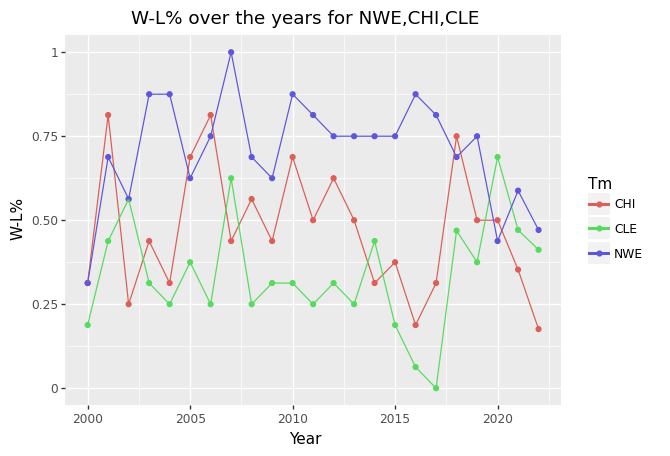

<ggplot: (8764022009826)>

In [186]:
(
    ggplot(example_teams)  # plots data
    + aes(x="Year", y="W-L%", color = "Tm")  
    + geom_point()
    + geom_line()
    +ggtitle('W-L% over the years for NWE,CHI,CLE')
)

# Playoffs

### Only contains playoffs from 2002-2023

In [78]:
def clean_playoffs(df):
    df = df[~(df['Seed'].isnull())]
    df = df[['Seed', 'Tm', 'Year']]
    return(df)

In [79]:
nfc_playoffs = scrape_stats(2002,2023,'playoffs','nfc_playoffs')
nfc_playoffs = clean_playoffs(nfc_playoffs)
nfc_playoffs

,Seed,Tm,Year
0,1.0,Philadelphia Eagles,2002
1,2.0,Tampa Bay Buccaneers,2002
2,3.0,Green Bay Packers,2002
3,4.0,San Francisco 49ers,2002
4,5.0,New York Giants,2002
...,...,...,...
2,3.0,Minnesota Vikings,2022
3,4.0,Tampa Bay Buccaneers,2022
4,5.0,Dallas Cowboys,2022
5,6.0,New York Giants,2022


In [80]:
afc_playoffs = scrape_stats(2002,2023,'playoffs','afc_playoffs')
afc_playoffs = clean_playoffs(afc_playoffs)

afc_playoffs

,Seed,Tm,Year
0,1.0,Oakland Raiders,2002
1,2.0,Tennessee Titans,2002
2,3.0,Pittsburgh Steelers,2002
3,4.0,New York Jets,2002
4,5.0,Indianapolis Colts,2002
...,...,...,...
2,3.0,Cincinnati Bengals,2022
3,4.0,Jacksonville Jaguars,2022
4,5.0,Los Angeles Chargers,2022
5,6.0,Baltimore Ravens,2022


### Scrape Playoff teams from 2000 and 2001

In [85]:
def scrape_0001playoffs(url):
    page = requests.get(url)
    soup = bs(page.text, 'lxml')
    table = soup.find_all('table', class_ = 'wikitable')
    df = pd.read_html(str(table))[0]
    df.columns = df.columns.astype(str)
    df= df[2:]
    return(df)

In [86]:
def clean_0001playoffs(df, year,colnum):
    df.rename(columns = {'0':'Seed', colnum:'Tm'},inplace=True)
    df['Year'] = year
    df['Tm'] = df['Tm'].str.replace(r"\(.*\)","", regex=True).str.strip()
    return(df)

In [89]:
playoffs_00 = scrape_0001playoffs('https://en.wikipedia.org/wiki/2000%E2%80%9301_NFL_playoffs')
playoffs_01 = scrape_0001playoffs('https://en.wikipedia.org/wiki/2001%E2%80%9302_NFL_playoffs')

In [91]:
afc_01 = playoffs_01.iloc[:,:2].reset_index(drop=True)
nfc_01 = playoffs_01.drop('1',axis =1)

afc_00 = playoffs_00.iloc[:,:2].reset_index(drop=True)
nfc_00 = playoffs_00.drop('1',axis =1)

nfc_00 = clean_0001playoffs(nfc_00,2000,'2')
afc_00 = clean_0001playoffs(afc_00,2000,'1')
afc_01 = clean_0001playoffs(afc_01,2001,'1')
nfc_01 = clean_0001playoffs(nfc_01,2001,'2')

In [93]:
nfc_00

,Seed,Tm,Year
2,1,New York Giants,2000
3,2,Minnesota Vikings,2000
4,3,New Orleans Saints,2000
5,4,Philadelphia Eagles,2000
6,5,Tampa Bay Buccaneers,2000
7,6,St. Louis Rams,2000


In [94]:
afc_01

,Seed,Tm,Year
0,1,Pittsburgh Steelers,2001
1,2,New England Patriots,2001
2,3,Oakland Raiders,2001
3,4,Miami Dolphins,2001
4,5,Baltimore Ravens,2001
5,6,New York Jets,2001


# Concat Playoffs

In [95]:
def concat_playoffs(playoff00,playoff01,playoff):
    df = pd.concat([playoff00,playoff01,playoff],axis =0)
    df['Seed'] = df['Seed'].astype(float)

    df['Tm'] = df['Tm'].map(abbrv)
    df['Made Playoffs'] = 1
    return(df)

In [96]:
nfc_playoff_teams = concat_playoffs(nfc_00,nfc_01,nfc_playoffs)
afc_playoff_teams = concat_playoffs(afc_00,afc_01,afc_playoffs)

In [97]:
made_playoffs = pd.concat([afc_playoff_teams, nfc_playoff_teams], axis = 0)
made_playoffs.drop('Seed',axis=1,inplace=True)

In [98]:
made_playoffs

,Tm,Year,Made Playoffs
0,TEN,2000,1
1,LVR,2000,1
2,MIA,2000,1
3,BAL,2000,1
4,DEN,2000,1
...,...,...,...
2,MIN,2022,1
3,TAM,2022,1
4,DAL,2022,1
5,NYG,2022,1


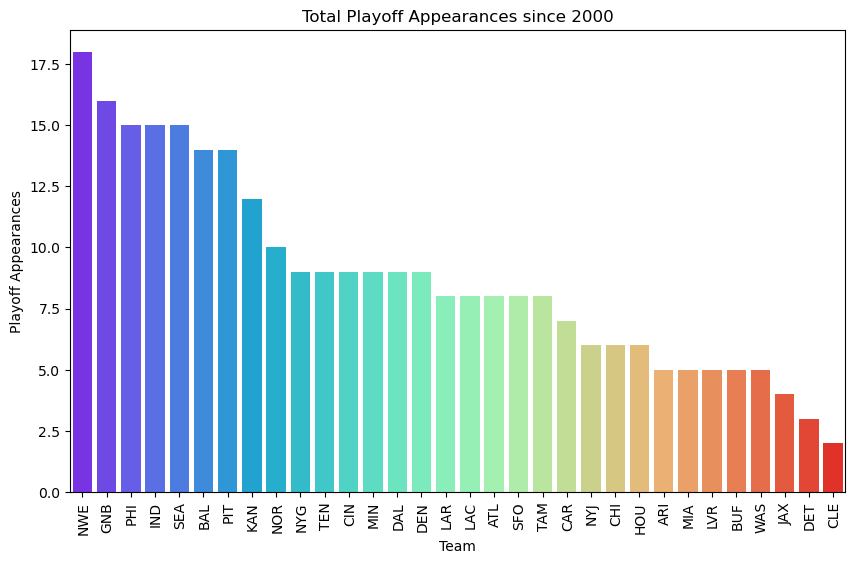

In [187]:
ax = plots(10,6,made_playoffs.groupby(['Tm'], as_index=False)['Made Playoffs'].sum().sort_values('Made Playoffs',ascending = False), 'Tm', 'Made Playoffs',
     'rainbow', 'Team', 'Playoff Appearances', "Total Playoff Appearances since 2000", hue = None)
plt.xticks(rotation=90, ha='right')
plt.show()

In [99]:
def scrape_site(url,class_):
    page = requests.get(url)
    soup = bs(page.text, 'lxml')
    table = soup.find_all('table', class_ = class_)
    df = pd.read_html(str(table))[0]
    return(df)

In [100]:
def clean_chip(df):
    df[['M/D', 'Year']] = df['Date'].str.split(',', expand=True)
    df.drop(['Date', 'M/D'], axis = 1, inplace = True)
    df['Year'] = pd.to_numeric(df['Year'])
    df['Year'] = df['Year'] -1
    df = df[df['Year'] >= 2000]
    df['Winner'] = df['Winner'].map(abbrv)
    df['Loser'] = df['Loser'].map(abbrv)
    return(df)

In [101]:
def meltchip(chip):
    df = pd.melt(chip, id_vars='Year', value_vars=['Winner','Loser'], value_name='Tm')
    df.drop('variable', axis =1, inplace = True)
    df['Made Championship'] = 1
    return(df)

## SuperBowl Winners

In [177]:
superbowls = scrape_site('https://champsorchumps.us/records/super-bowl-champions-full-list','table')
superbowls = superbowls.loc[superbowls['Year'] >= 2000, :]
wonsb = superbowls.loc[:,['Year', 'Winner']]

In [178]:
wonsb.rename(columns = {'Winner':'Tm'}, inplace=True)
wonsb['Tm'] = wonsb['Tm'].str.replace(r"\(.*\)","", regex=True).str.strip()
wonsb['Tm'] = wonsb['Tm'].map(abbrv)
wonsb['Won SB'] = 1
wonsb.head(10)

,Year,Tm,Won SB
0,2022,KAN,1
1,2021,LAR,1
2,2020,TAM,1
3,2019,KAN,1
4,2018,NWE,1
5,2017,PHI,1
6,2016,NWE,1
7,2015,DEN,1
8,2014,NWE,1
9,2013,SEA,1


In [190]:
sb_totals = wonsb.groupby(['Tm'], as_index=False)['Won SB'].sum().sort_values('Won SB',ascending = False)
sb_totals


,Tm,Won SB
7,NWE,6
0,BAL,2
4,KAN,2
8,NYG,2
10,PIT,2
12,TAM,2
1,DEN,1
2,GNB,1
3,IND,1
5,LAR,1


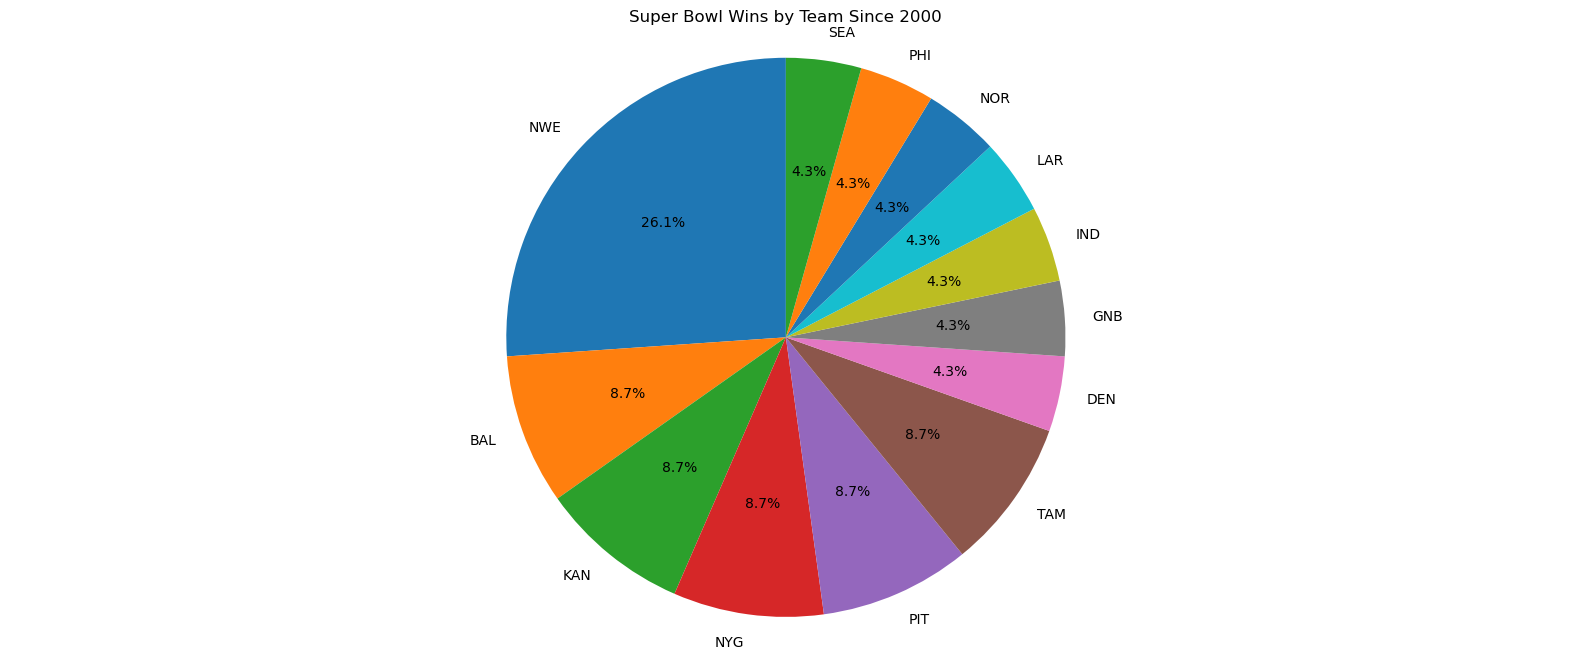

In [192]:

import matplotlib.pyplot as plt

# create data
# teams = ['New England Patriots', 'Pittsburgh Steelers', 'New York Giants', 'Baltimore Ravens', 'Denver Broncos', 'Tampa Bay Buccaneers']
# wins = [6, 6, 4, 2, 3, 1]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red']

# create pie chart
plt.pie(sb_totals['Won SB'], labels=sb_totals['Tm'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# add title
plt.title('Super Bowl Wins by Team Since 2000')

# display plot
plt.show()

## Made AFC or NFC Championship

In [105]:
nfc_championship = scrape_site('https://eatdrinkandsleepfootball.com/history/superbowl/nfc_champ.html', 'projections')
nfc_championship.drop(['Score', 'Home Team'], axis =1, inplace=True)
afc_championship = scrape_site('https://eatdrinkandsleepfootball.com/history/superbowl/afc_champ.html', 'projections')
afc_championship.drop(['Score', 'Home Team'], axis =1, inplace=True)


In [106]:
afc_championship

,Date,Winner,Loser
0,"Jan. 29, 2023",Kansas City Chiefs,Cincinnati Bengals
1,"Jan. 30, 2022",Cincinnati Bengals,Kansas City Chiefs
2,"Jan. 24, 2021",Kansas City Chiefs,Buffalo Bills
3,"Jan. 19, 2020",Kansas City Chiefs,Tennessee Titans
4,"Jan. 20, 2019",New England Patriots,Kansas City Chiefs
...,...,...,...
58,"Dec. 26, 1964",Buffalo Bills,San Diego Chargers
59,"Jan. 5, 1964",San Diego Chargers,Boston Patriots
60,"Dec. 23, 1962",Dallas Texans,Houston Oilers
61,"Dec. 24, 1961",Houston Oilers,San Diego Chargers


In [107]:
nfc_championship

,Date,Winner,Loser
0,"Jan. 29, 2023",Philadelphia Eagles,San Francisco 49ers
1,"Jan. 30, 2022",Los Angeles Rams,San Francisco 49ers
2,"Jan. 24, 2021",Tampa Bay Buccaneers,Green Bay Packers
3,"Jan. 19, 2020",San Francisco 49ers,Green Bay Packers
4,"Jan. 20, 2019",Los Angeles Rams,New Orleans Saints
...,...,...,...
85,"Dec. 12, 1937",Washington,Chicago Bears
86,"Dec. 13, 1936",Green Bay Packers,Boston
87,"Dec. 15, 1935",Detroit Lions,New York Giants
88,"Dec. 9, 1934",New York Giants,Chicago Bears


### NFC

In [108]:
nfc_championship = clean_chip(nfc_championship)
nfc_made_champsionship = meltchip(nfc_championship)
nfc_made_champsionship.head()

,Year,Tm,Made Championship
0,2022,PHI,1
1,2021,LAR,1
2,2020,TAM,1
3,2019,SFO,1
4,2018,LAR,1


In [109]:
nfc_made_superbowl = nfc_championship.drop('Loser',axis =1)
nfc_made_superbowl['Made Superbowl'] = 1
nfc_made_superbowl.head()

,Winner,Year,Made Superbowl
0,PHI,2022,1
1,LAR,2021,1
2,TAM,2020,1
3,SFO,2019,1
4,LAR,2018,1


### AFC

In [110]:
afc_championship = clean_chip(afc_championship)
afc_made_champsionship = meltchip(afc_championship)
afc_made_champsionship.head()

,Year,Tm,Made Championship
0,2022,KAN,1
1,2021,CIN,1
2,2020,KAN,1
3,2019,KAN,1
4,2018,NWE,1


In [111]:
afc_made_superbowl = afc_championship.drop('Loser',axis =1)
afc_made_superbowl['Made Superbowl'] = 1
afc_made_superbowl.head()

,Winner,Year,Made Superbowl
0,KAN,2022,1
1,CIN,2021,1
2,KAN,2020,1
3,KAN,2019,1
4,NWE,2018,1


In [112]:
made_superbowl = pd.concat([afc_made_superbowl, nfc_made_superbowl],axis=0).reset_index(drop=True)
made_championship = pd.concat([afc_made_champsionship, nfc_made_champsionship],axis =0).reset_index(drop=True)
made_superbowl.rename(columns = {'Winner':'Tm'},inplace=True)
made_superbowl.head()

,Tm,Year,Made Superbowl
0,KAN,2022,1
1,CIN,2021,1
2,KAN,2020,1
3,KAN,2019,1
4,NWE,2018,1


In [113]:
made_championship.head()

,Year,Tm,Made Championship
0,2022,KAN,1
1,2021,CIN,1
2,2020,KAN,1
3,2019,KAN,1
4,2018,NWE,1


In [199]:
awards_records = nfl_standings.merge(awards,on=['Tm','Year'], how = 'outer').merge(made_championship,on=['Tm','Year'], how = 'outer').merge(made_superbowl,on=['Tm','Year'], how = 'outer').merge(wonsb,on=['Tm','Year'], how = 'outer').merge(made_playoffs,on=['Tm','Year'], how = 'outer')
awards_records.fillna(0,inplace=True)
#awards_records['Year'] = awards_records['Year']+1
awards_records['MakePlayoffsNextYear'] = awards_records.groupby('Tm')['Made Playoffs'].shift(-1)

awards_records[awards_records['Year']==2022].sort_values('Made Playoffs',ascending=False)




,Tm,W-L%,Year,R.O.D_record,div_AFCEast,div_AFCNorth,div_AFCSouth,div_AFCWest,div_NFCEast,div_NFCNorth,div_NFCSouth,div_NFCWest,MVPs,OPOYs,DPOYS,ROY_OFFENSE,ROY_DEFENSE,QBProBowl,ProBowl,1stTeam,2ndTeam,Made Championship,Made Superbowl,Won SB,Made Playoffs,MakePlayoffsNextYear
388,MIA,0.529,2022,0.565333,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
480,NYG,0.559,2022,0.676667,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN
411,MIN,0.765,2022,0.392000,0,0,0,0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
365,KAN,0.824,2022,0.411667,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN
342,JAX,0.529,2022,0.294333,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
549,PHI,0.824,2022,0.588333,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2.0,4.0,1.0,1.0,0.0,1.0,NaN
595,LAC,0.588,2022,0.490333,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
618,SFO,0.765,2022,0.352667,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0,1.0,0.0,0.0,1.0,NaN
641,SEA,0.529,2022,0.431333,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
206,DAL,0.706,2022,0.627667,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN


In [196]:
awards_records.to_csv('awards_playoffs.csv')